In [2]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
from nltk.stem import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from PIL import _imaging
from sklearn.svm import SVC
from numpy import genfromtxt

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

import csv
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import pandas as pd

import numpy as np


def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:, np.argsort(
        np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


data = pd.read_csv('/content/out.csv')
data.head()
df = data
df = df.drop(columns=['Label'])
X = df
print(np.shape(X))
y = data['Label']
print(np.shape(X))


num_feats = 850
feature_name = X.columns.tolist()
cor_support, cor_feature = cor_selector(X, y, num_feats)

our_feature = []

our_feature.append(["Pearson Correlation", cor_feature])


# Chi-Squared
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:, chi_support].columns.tolist()


our_feature.append(["Chi-Squared", chi_feature])

# Recursive Feature Elimination
rfe_selector = RFE(estimator=LogisticRegression(),
                   n_features_to_select=num_feats, step=30, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:, rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')


our_feature.append(["Recursive Feature Elimination", rfe_feature])


# Random Forest

embeded_rf_selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:, embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

our_feature.append(["Random Forest", embeded_rf_feature])

# LightGBM


lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
                      reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:, embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

our_feature.append(["LightGBM", embeded_lgb_feature])

(2479, 988)
(2479, 988)
Fitting estimator with 988 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 958 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 928 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 898 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 868 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


850 selected features
209 selected features
199 selected features


Pearson Correlation
Test Accuracy: 92.54032258064517 %


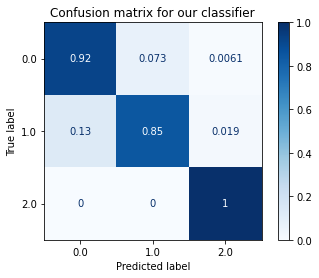

Chi-Squared
Test Accuracy: 91.93548387096774 %


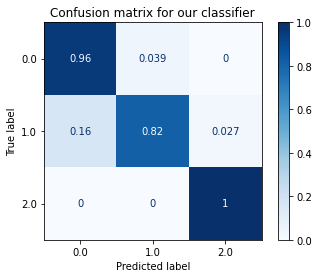

Recursive Feature Elimination
Test Accuracy: 92.13709677419355 %


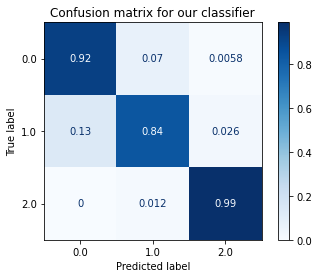

Random Forest
Test Accuracy: 94.35483870967742 %


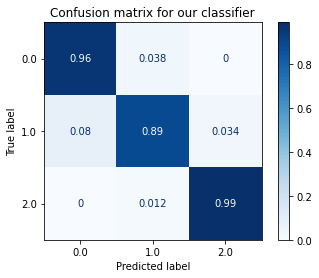

LightGBM
Test Accuracy: 96.7741935483871 %


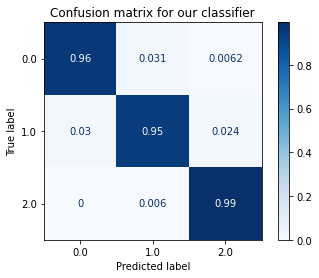

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


dataset = pd.read_csv('/content/out.csv')

for i in our_feature:
  print(i[0])
  temp=i[1]
  Y_ori=np.array(dataset['Label'])
  d=dataset[temp]
  X_ori=np.array(d)

  X_train, X_test, y_train, y_test = train_test_split(X_ori, Y_ori, test_size=0.20)


  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)


  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  from sklearn.metrics import classification_report, confusion_matrix
  # print(confusion_matrix(y_test, y_pred))
  # print(classification_report(y_test, y_pred))
  print("Test Accuracy:", (classifier.score(X_test, y_test.ravel()))*100, "%")
  matrix = plot_confusion_matrix(classifier,
                               X_test,
                               y_test,
                               cmap=plt.cm.Blues,
                               normalize='true')
  plt.title('Confusion matrix for our classifier')

  plt.show()

Text(0, 0.5, 'Mean Error')

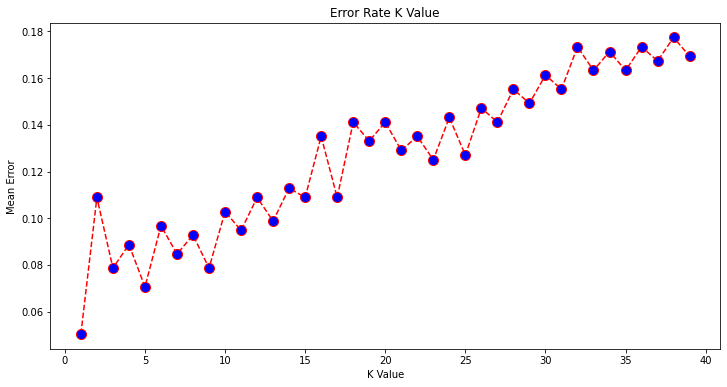

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')